
**Assignment 1: Simulations (Given: 17 Jan 2023, Due: 31 Jan 2023  2pm)**
    

**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle before the due date. 
* Your code should be well commented and should be compatible with python3.
* For this assignment, you are allowed to import the libraries `random` and `mathplotlib` of python3. No other libraries may be imported.
* For questions involving constructing plots, sample outputs may be provided. Your answers need not exactly match them. However if your plots are significantly deviating from what is given, it is possibily an indication that your code is doing something incorrect.

# Law of Large Numbers

(a)  Write a function `simulateDice(n)` that rolls a six-sided die $n$ times and returns the frequencies of the results, i.e., the number of times 1 appears, the no. of times 2 appears, etc. 

In [1]:
import matplotlib.pyplot as plt
import random
def simulateDice(n):
    l = [0, 0, 0, 0, 0, 0]    #creating an empty list 
    for i in range(n):
        l[(random.randint(1, 6))-1]+=1    #the random integer's place is increased by 1 in the list
    return l    #returning the list after n iterations
simulateDice(int(input("Enter the number of times the dice is rolled\n")))    #calling the function

Enter the number of times the dice is rolled
15


[1, 4, 4, 3, 2, 1]

(b) For each $n \in \{6,6^2,60,600,6 \times 10^{6}\}$, run `simulateDice(n)` and plot a bar chart with outcomes of die rolls against the frequencies. A sample output looks as follows. 


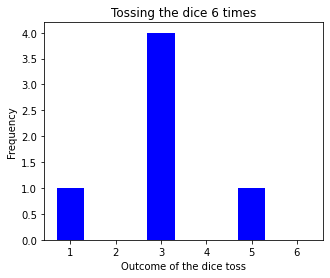

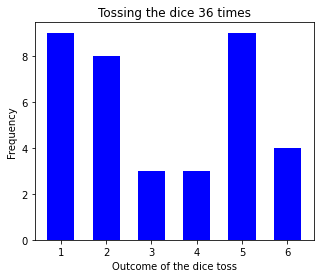

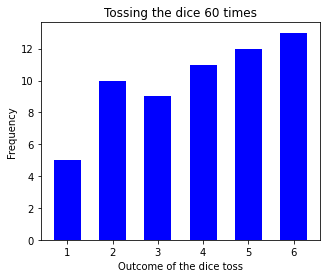

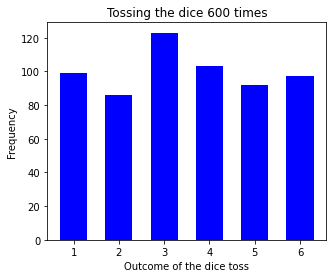

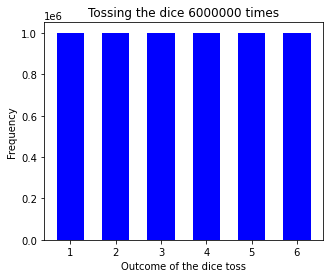

In [2]:
import matplotlib.pyplot as plt
import random
def simulateDice(n):    #same function as in 2(a)
    l = [0, 0, 0, 0, 0, 0]
    for i in range(n):
        l[(random.randint(1, 6))-1]+=1
    return l
n = [6, 36, 60, 600, 6000000]    #creating a list of each n required
for i in range(5):    #repeating the operation 5 times for all values of n
    fig = plt.figure(figsize = (5,4))    #making the bar chart
    x = [1, 2, 3, 4, 5, 6]    #this list is the x axis of the graph
    y = simulateDice(n[i])    #this list is the y axis of the graph, the frequency of each number's occurence
    plt.bar(x, y, color='blue', width = 0.6)    #making the chart's visual characteristics
    plt.xlabel("Outcome of the dice toss")
    plt.ylabel("Frequency")
    plt.title(f"Tossing the dice {n[i]} times")
    plt.show()

(c)  Write a function `avgDice(n)` that calls `simulateDice(n)` and compute the average of the $n$ outcomes. Run avgDice(n) 1000 times and plot a bar chart with iterations (i.e., 1 to 1000) against the average values. A sample output looks for $n = 10$ as follows. 


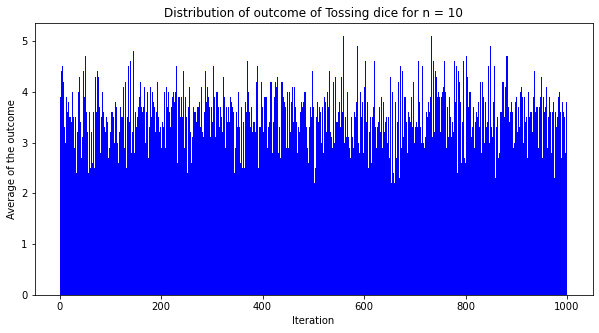

In [4]:
import matplotlib.pyplot as plt
import random
def simulateDice(n):    #same function as before
    l = [0, 0, 0, 0, 0, 0]
    for i in range(n):
        l[(random.randint(1, 6))-1]+=1
    return l
def avgDice(n):    #the required function
    avg = 0 
    l=simulateDice(n)    #l is the output list of the simulation
    for i in range(len(l)):    #for all values in l
        avg=l[i]*(i+1)+avg    #computing the sum of product of frequencies and the values
    avg=avg/n    #computing the average by dividing with the sum of all frequencies i.e. n
    return avg
n=10    #same value as the sample given in question
fig = plt.figure(figsize = (10,5))    # making the chart
x = list(range(1, 1001))    # the x axis of the graph
y = list(range(1, 1001))    # list with 1000 elements
for i in range(1000):
    y[i]=avgDice(n)    # giving values to the list with 1000 elements by calling the avgDice function
plt.bar(x, y, color='blue', width = 1)    #giving the visual charcteristics to the chart
plt.xlabel("Iteration")
plt.ylabel("Average of the outcome")
plt.title(f"Distribution of outcome of Tossing dice for n = {n}")
plt.show()

(d) Repeat part (c) for each $n \in \{10^2,10^3,10^5\}$. How does the chart change with $n$? 

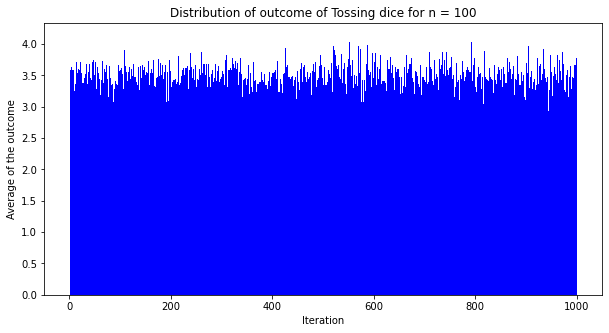

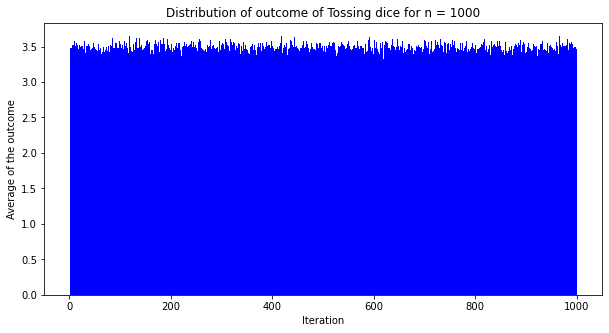

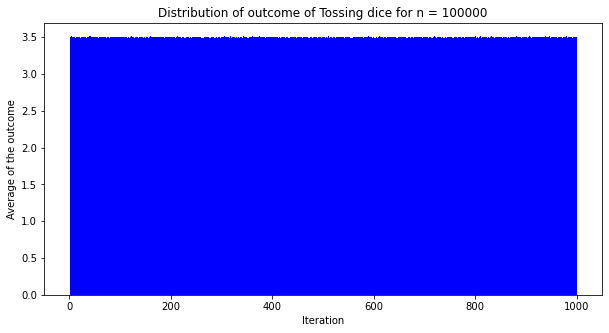

In [5]:
import matplotlib.pyplot as plt
import random
def simulateDice(n):    # same function as before
    l = [0, 0, 0, 0, 0, 0]
    for i in range(n):
        l[(random.randint(1, 6))-1]+=1
    return l
def avgDice(n):    # same function as before
    avg = 0 
    l=simulateDice(n)
    for i in range(len(l)):
        avg=l[i]*(i+1)+avg
    avg=avg/n
    return avg
n = [100, 1000, 100000]    # the list for all the possible values of n required
for j in range(len(n)):
    fig = plt.figure(figsize = (10,5))    # making the bar chart
    x = list(range(1, 1001))    # x axis of the chart
    y = list(range(1, 1001))    # list l with 100 elements
    for i in range(1000):
        y[i]=avgDice(n[j])     # giving values to the list with 1000 elements by calling the avgDice function
    plt.bar(x, y, color='blue', width = 1)    #giving the visual charcteristics to the chart
    plt.xlabel("Iteration")
    plt.ylabel("Average of the outcome")
    plt.title(f"Distribution of outcome of Tossing dice for n = {n[j]}")
    plt.show()

# Birthday Paradox

(a) Write a function `simulateBday(n)` that generates $n$ random birthdays (i.e., $n$ random integers between 1 and 366) and determines whether there is a pair of same birthdays or not.

In [6]:
import random
def simulateBday(n):
    l=list()    #creating an empty list
    for i in range(n):
        l.append(random.randint(1, 366))    #choosing and appending a random number between 1 and 366 (both inclusive)
    count = 0    #count will store the count of the number of pairs with equal pairs
    for i in range(n):
        for j in range(i+1, n):    # starts with the element next to i to avoid repetition
            if(l[i]==l[j]):    #comparing the elements
                return 1
    else:
        return 0
simulateBday(int(input("Enter the number of random birthdays\n")))    #calling the function

Enter the number of random birthdays
120


1

(b)   Run `simulateBday(n)` 100 times and determine the number $x$ of times that the $n$ birthdays have an equal pair. Treat $x/100$ as the probability of two same birthdays among $n$ random birthdays.

In [7]:
import random
def simulateBday(n):    #same function as before
    l=list()    #creating an empty list
    for i in range(n):
        l.append(random.randint(1, 366))    #choosing and appending a random number between 1 and 366 (both inclusive)
    count = 0    #count will store the count of the number of pairs with equal pairs
    for i in range(n):
        for j in range(i+1, n):    # starts with the element next to i to avoid repetition
            if(l[i]==l[j]):    #comparing the elements
                return 1
    else:
        return 0
m = list()    #creating an empty list
k=int(input("Enter the number of random birthdays\n"))
for i in range(100):
    m.append(simulateBday(k))    #if the integer returned from the function is 1, we count it as a desired case and store it in a list
x = sum(m)    #sum of the list to find x for all the 100 iterations
print(str(x/100)+ " is the probability for 100 iterations") #printing the probability for 100 iterations

Enter the number of random birthdays
23
0.39 is the probability for 100 iterations


(c) Run `simulateBday(n)` for $n \in [100]$ where $[k]$ denotes the set $\{1,2,\ldots, k\}$.


In [8]:
import random
def simulateBday(n):    #same function as before
    l=list()    #creating an empty list
    for i in range(n):
        l.append(random.randint(1, 366))    #choosing and appending a random number between 1 and 366 (both inclusive)
    count = 0    #count will store the count of the number of pairs with equal pairs
    for i in range(n):
        for j in range(i+1, n):    # starts with the element next to i to avoid repetition
            if(l[i]==l[j]):    #comparing the elements
                return 1
    else:
        return 0
for i in range(100):
    print(simulateBday(i + 1))    #printing the result for each of the 100 cases

0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


(d) What is the minimum $n$ that guarantees two same birthdays? Identify a range of values of $n$ that makes the probability of two same birthdays greater than $0.5$.


In [9]:
import random
def simulateBday(n):    #same function as before
    l=list()    #creating an empty list
    for i in range(n):
        l.append(random.randint(1, 366))    #choosing and appending a random number between 1 and 366 (both inclusive)
    count = 0    #count will store the count of the number of pairs with equal pairs
    for i in range(n):
        for j in range(i+1, n):    # starts with the element next to i to avoid repetition
            if(l[i]==l[j]):    #comparing the elements
                return 1
    else:
        return 0
temp = 0    #temp will increase till we can gurantee atleast two same birthdays
ans = 0    #ans will store the result for the minimum n for 0.5 probability and all n greater than that value have greater than 0.5 probability
tests = 1000    #number of tests, greater value produces more accurate result(Law Of Large Numbers)
while(1):
    m = list()    #creating an empty list to eventually calculate the probability
    cp = 0    #this will help breaking the loop after we get the answer
    temp += 1
    for j in range(tests):
        if(simulateBday(temp) == 0):    #if during any of the iterations, we get a 0, we continue the loop using value of cp
            cp = 1
        m.append(simulateBday(temp))    #appending whether the iteration has atleast one equal birthday pair or not
    if((sum(m)/tests)>=0.5 and ans == 0):    # sum(m)/tests is the probability and if ans is unchanged and probability is > 0.5, we got the required number for atleast 0.5 probability
        ans = temp
    if(cp == 0):    # if cp == 0, we break the loop as during all the iterations none of the output was 0, and hence we have our answer, n for guranteed atleast one equal birthday pair
        break
print("minimum n that guarantees two same birthdays is " + str(temp))    #printing the result
print("n > " + str(ans) + " makes the probability of two same birthdays greater than  0.5")    

minimum n that guarantees two same birthdays is 69
n > 24 makes the probability of two same birthdays greater than  0.5


# Monty Hall Game

You are on a game show and given the choice of picking one of the three boxes ($X$, $Y$, $Z$). Two of the boxes are empty and one contains a gift. You pick a box, say $X$, and the host (who knows what is inside each of the boxes) opens another box, say $Y$, which is empty. You now have the option of retaining your choice ($X$) or switching it (to $Z$). Is it to your advantage to switch your choice in order to get the gift? This advantage is defined as the fraction of times switching the choice leads to a win when the game is played 1000 times.

In [10]:
import random
count = 0    #this variable will be used to find probability
l = range(1, 4)    #this is a list consisting 1, 2, 3 as elements
for i in range(1000):     #making all the iterations
    ans = random.randint(1, 3)    #randomly choosing where the gift will be
    a = 1    #this is the X chosen by the player
    b = random.choice([x for x in l if x != ans and x != 1])    #host choosing the empty box not chosen by the player
    a = random.choice([x for x in l if x != b and x != 1])    #switching to the box that is not selected by the host
    if(a == ans):    #count will increase if the condition satisfies
        count += 1
print(str(count/1000) + " is the winning probability after switching")    #printing the probability

0.642 is the winning probability after switching


# Game of Dice

Simulate the following dice game. 

1. Roll two six-sided dice. 
    * If the sum is 7 or 11 on the first roll, you win. 
    * If the sum is 2, 3 or 12 on the first roll, you lose. 
    * If the sum is 4, 5, 6, 8, 9 or 10 on the first roll, that sum becomes your point. 
2. Continue rolling the dice until the sum is 7 (game lost) or equal to your point (game won). 

If $n$ games are played and $q$ of these games are won, then the chance of winning is $q/n$. Sample simulation of the game for $n=10$ is as follows. What is the chance of winning at this game?

In [11]:
import random
count=0
for i in range(10):
    a = random.randint(1, 6)    #the outcome of the first dice
    b = random.randint(1, 6)    #the outcome of the second dice
    sm = a + b    #sum of both the outcomes
    wl = 0    #this will store win/loss(1/0 respectively)
    if sm == 7 or sm == 11:    #if these condition satisfies, the player wins
        wl = 1
    elif sm == 2 or sm == 3 or sm == 12:    #for these cases, the player looses
        wl = 0
    else:    
        pt = sm
        while(sm==7 or sm==pt):    #repeat till we get a win or loose
            a = random.randint(1, 6)    #choosing random integers again
            b = random.randint(1, 6)
            sm = a + b
            if sm == 7:    #checking if sum is 7
                wl=0
            elif sm == pt:    #checking if sum is the point(the earlier score)
                wl=1
    if(wl==1):    #count increases by 1 when the player wins
        count += 1
print(str(count/10) + " is the chance of winning the game")    #printing the result for n = 10

0.3 is the chance of winning the game


# Central Limit Theorem 

From a set $S=\{1,1,2,3,5,5,5,7,8,10,12\}$ of numbers, pick $n=1$ numbers at random and compute the average. Repeat this $10^5$ times and plot the frequency of the average values (i.e., how many times each average value occurs)  as a histogram. Repeat this experiment with $n \in \{5,10,30,100,1000\}$.

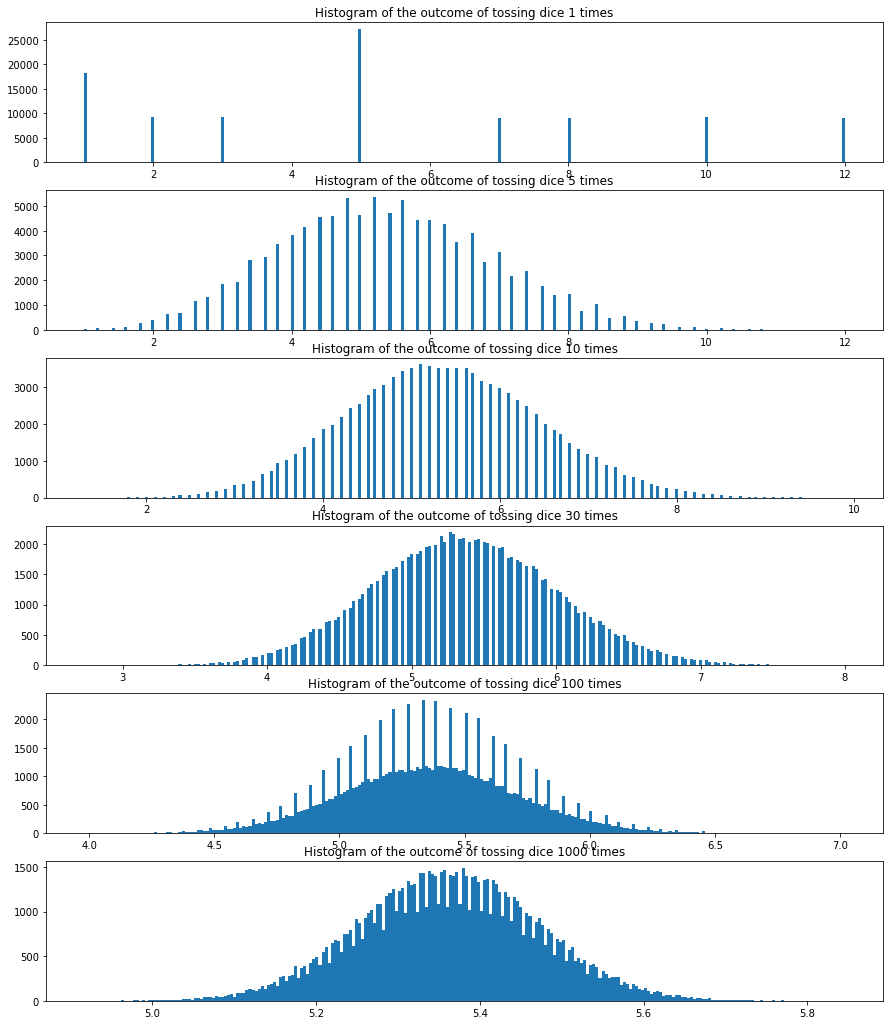

In [12]:
import random
import matplotlib.pyplot as plt
m = [1, 5, 10, 30, 100, 1000]    #list of values of n
l = [1, 1, 2, 3, 5, 5, 5, 7, 8, 10, 12]    #list of values
tests = 100000    #number of tests
ans = list()    #creating an empty list to store the list of averages
for j in range(0, len(m)):
    mean = list()    #creating an empty list that will store the average for each iteration
    for i in range(tests):    #running the tests 100000 times
        temp = random.choices(l, k=m[j])    #choosing random numbers from the given set
        mean.append(sum(temp)/len(temp))    #appending the average for each iteration
    ans.append(mean)    #appending the list to another list for plotting
f, plots = plt.subplots(len(m), figsize = (15, 18))    #plotting the graph
i = 0
for j in range(len(ans)):    #plotting all the lists in the ans
    plots[i].set_title(f"Histogram of the outcome of tossing dice {m[i]} times")    #giving the visual characteristics to the graph
    plots[i].hist(ans[j], 250)
    plots[i].plot()
    i+=1